# Definiciones basicas de vectores y algunas operaciones

In [1]:
vco=[1 2 3] # esto es un covector

1×3 Array{Int64,2}:
 1  2  3

In [2]:
typeof(vco)

Array{Int64,2}

In [3]:
# Este es un vector usual, dependiendo de la convencion que sigamos podemos tener
# mas o menos cuidado. Ayuda al principio ser un poco ordenado
v=[1,2,3.2+2im]

3-element Array{Complex{Float64},1}:
 1.0+0.0im
 2.0+0.0im
 3.2+2.0im

In [4]:
a=v' #Transposición conjugada, es decir la operacion daga o pasar de bra a ket.

1×3 Array{Complex{Float64},2}:
 1.0-0.0im  2.0-0.0im  3.2-2.0im

In [5]:
# Producto punto usual, notese que toma el conjugado y luego el producto, por lo 
# que tenemos que el producto es real y positivo
dot(v,v)

19.240000000000002 + 0.0im

In [6]:
# Este es el producto exterior. Es el resultando de un ket por un bra 
# (que es diferente de un bra por un ket), y me da un proyector. Exploraremos
# un poco mas profundamente este concepto
v*v' 

3×3 Array{Complex{Float64},2}:
 1.0+0.0im  2.0+0.0im    3.2-2.0im
 2.0+0.0im  4.0+0.0im    6.4-4.0im
 3.2+2.0im  6.4+4.0im  14.24+0.0im

In [7]:
# Este parece el producto interno, pero notese que es un arreglo de 1x1 por lo 
# que resulta un poco inconveniente pues carga informacion irrelevante.
v'*v

1-element Array{Complex{Float64},1}:
 19.24+0.0im

In [9]:
?@show

```
@show
```

Show an expression and result, returning the result.


In [8]:
@show vco #Arreglo de enteros ;
@show v #arreglo de enteros complejos ;

vco = [1 2 3]
v = Complex{Float64}[1.0+0.0im,2.0+0.0im,3.2+2.0im]


In [12]:
?randn # Esta funcion genera numeros aleatorios gaussianos

search: randn randn! sprandn randstring rand! rand randexp randperm randjump



```
randn([rng], [T=Float64], [dims...])
```

Generate a normally-distributed random number of type `T` with mean 0 and standard deviation 1. Optionally generate an array of normally-distributed random numbers. The `Base` module currently provides an implementation for the types `Float16`, `Float32`, and `Float64` (the default).


In [13]:
# Pkg.add("Plots") # Quiza sea necesario para algunos bajar este paquete

In [14]:
using Plots # Este paquete lo usamos para graficar en forma simple. 

INFO: Installing PyQt5 via Anaconda's /home/david/anaconda3/bin/conda...


Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/david/anaconda3:
#
pyqt                      4.11.4                   py34_4  



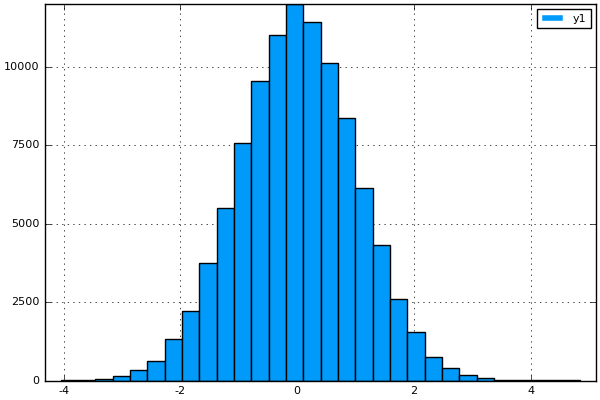

In [15]:
random_numbers=randn(100000);
Plots.histogram(random_numbers) # Usando histogram

**Direcciones aleatorias**
Vamos a usar estados aleatorios. Estos se van a construir usando variables gaussianas. Dado que tenemos dos variables gaussianas con el mismo ancho, $x$ y $y$, una rotacion produce dos variables gaussianas con el mismo ancho. 

Imaginen las distribuciónes
\begin{align}
P(x) &\propto e^{-x^2}\\
P(y) &\propto e^{-y^2}.
\end{align}
entonces, la distribución conjunta estará dada por la multiplicacion de las distrubuciones:
\begin{align}
P(x,y) &\propto e^{-x^2}e^{-y^2}\\
&=e^{-r^2}
\end{align}
en coordenadas polares. 

Claramente el argumento se extiende para $n$ variables. Esto entonces nos permite elegir una dirección aleatoria con distribución uniforme, que será el punto crucial para elegir de forma apropiada estados aleatorios, que no son más que direcciones en el espacio de Hilbert complejo. 

**Anonymos functions**
(from http://docs.julialang.org/en/stable/manual/functions/#anonymous-functions)

Functions can be created anonymously, without being given a name, using either of these syntaxes:
```julia
julia> x -> x^2 + 2x - 1
(::#1) (generic function with 1 method)

julia> function (x)
           x^2 + 2x - 1
       end
(::#3) (generic function with 1 method)
```

This creates a function taking one argument x and returning the value of the polynomial `x^2 + 2x - 1` at that value. Notice that the result is a generic function, but with a compiler-generated name based on consecutive numbering.

The primary use for anonymous functions is passing them to functions which take other functions as arguments. A classic example is `map()`, which applies a function to each value of an array and returns a new array containing the resulting values:
```julia
julia> map(round, [1.2,3.5,1.7])
3-element Array{Float64,1}:
 1.0
 4.0
 2.0
```
This is fine if a named function effecting the transform one wants already exists to pass as the first argument to `map()`. Often, however, a ready-to-use, named function does not exist. In these situations, the anonymous function construct allows easy creation of a single-use function object without needing a name:
```julia

julia> map(x -> x^2 + 2x - 1, [1,3,-1])
3-element Array{Int64,1}:
  2
 14
 -2
```
An anonymous function accepting multiple arguments can be written using the syntax `(x,y,z)->2x+y-z`.

In [16]:
z=randn(5000,2);
angles=map((x,y)->angle(x+y*im),z[:,1],z[:,2]);

In [17]:
p1=Plots.histogram(angles);

In [18]:
p2=scatter(z[:,1],z[:,2],aspect_ratio=1);


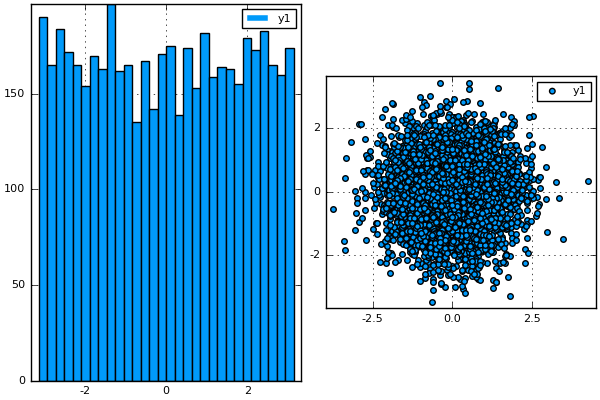

In [19]:
 plot(p1,p2)

In [20]:
zn=rand(5000,2)-1/2
anglesn=map((x,y)->angle(x+y*im),zn[:,1],zn[:,2]);


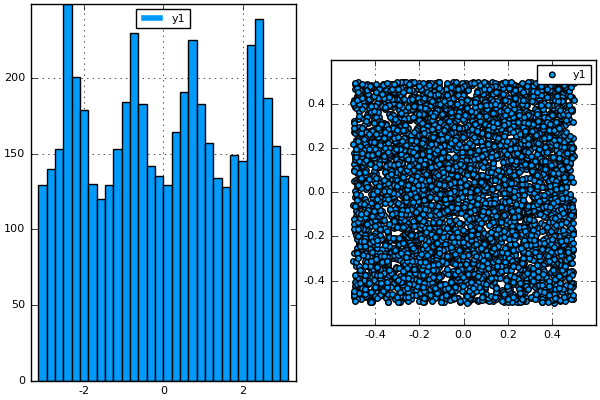

In [21]:
plot(Plots.histogram(anglesn),scatter(zn[:,1],zn[:,2],xlims = (-.6,.6),ylims = (-.6,.6),aspect_ratio=1))

# Estados aleatorios

In [22]:
v=randn(1,10)+randn(1,10)im # vector con numeros gaussianos aleatorios

1×10 Array{Complex{Float64},2}:
 1.16038-0.93898im  0.684577+0.468189im  …  1.15785-0.473974im

In [23]:
v=v/norm(v) # Podemos normalizar el estado dividiendolo por su norma;
@show norm(v) # Puede haber un error por la precision finita de la maquina;

norm(v) = 0.9999999999999999


* Pongamos todo en una función, frecuentemente es útil tener a la mano estados aleatorios.

In [24]:
"""
Esta función crea un estado cuantico aleatorio. La dimension por defecto es 2. 
"""
function random_state(dim=2)
    v=randn(1,dim)+randn(1,dim)im
    v=v/norm(v)
    return v'
end

random_state

In [25]:
?random_state # Se muestra la documentación de la función

search:



Esta función crea un estado cuantico aleatorio. La dimension por defecto es 2. 


In [26]:
v=random_state() # Probando la función sin argumentos

2×1 Array{Complex{Float64},2}:
  0.522325-0.423147im
 -0.315931+0.66956im 

In [27]:
v=random_state(20);
v

20×1 Array{Complex{Float64},2}:
   0.199867-0.00501597im
 -0.0217069+0.175605im  
  -0.253408-0.0480348im 
  0.0815941+0.175459im  
  -0.352069-0.00444688im
   0.118486+0.0261957im 
 -0.0813211+0.080387im  
  -0.144424-0.244336im  
  -0.181534-0.375692im  
 -0.0919149+0.143302im  
  -0.175312+0.134967im  
  0.0150977-0.0236806im 
   0.136245-0.0703098im 
   0.296154-0.0945919im 
 -0.0886787+0.241779im  
 -0.0643691-0.153368im  
 -0.0457046+0.0146309im 
 -0.0678908+0.0137068im 
   -0.10558-0.233677im  
   0.226345+0.0370071im 

In [28]:
norm(v)

0.9999999999999999

# Por hacer para la siguiente iteracion:

* Pensar si hacemos type_stable ahora, o quizá más adelante.
* Toca discutir un poco mas que es una distribución de probabilidad y quiza separar en dos clases. No alcancé a llegar a la esfera de Bloch